Q1-What is unsupervised learning in the context of machine learning?

Ans-Unsupervised learning involves algorithms that learn patterns from unlabelled data. The model tries to group or organize data based on similarities or differences without predefined labels.

Q2-How does K-Means clustering algorithm work?

Ans-K-Means partitions data into K clusters by:

Choosing K initial centroids

Assigning each data point to the nearest centroid

Updating centroids as the mean of assigned points

Repeating the assignment and update steps until convergence

Q3-Explain the concept of a dendrogram in hierarchical clustering.

Ans-A dendrogram is a tree-like diagram showing the arrangement of clusters produced by hierarchical clustering. It visualizes how clusters are merged or split at each step.

Q4-What is the main difference between K-Means and Hierarchical Clustering?

Ans-K-Means: Requires specifying the number of clusters; uses centroid-based partitioning.

Hierarchical: Does not require pre-defined K; builds a nested hierarchy of clusters.

Q5-What are the advantages of DBSCAN over K-Means?

Ans-Can find arbitrarily shaped clusters

Does not require specifying K

Identifies noise/outliers naturally

Q6-When would you use Silhouette Score in clustering?

Ans-It is used to measure how well a data point fits within its cluster. A higher score means better clustering quality.

Q7-What are the limitations of Hierarchical Clustering?

Ans-Computationally expensive (O(n²))

Not suitable for very large datasets

Sensitive to noise and outliers

Q8-Why is feature scaling important in clustering algorithms like K-Means?

Ans-Because clustering is based on distance metrics, features with larger scales can dominate the result. Scaling ensures all features contribute equally.

Q9-How does DBSCAN identify noise points?

Ans-Points that do not have enough neighbors within the specified radius (ε) are marked as noise (i.e., not belonging to any cluster).

Q10-Define inertia in the context of K-Means.

Ans-Inertia is the sum of squared distances of samples to their closest cluster center. Lower inertia means tighter clusters.

Q11-What is the elbow method in K-Means clustering?

Ans-A method to find the optimal number of clusters (K) by plotting inertia vs K and looking for the "elbow" point where the inertia starts decreasing slowly.

Q12-Describe the concept of "density" in DBSCAN.

Ans-Density is the number of points within a specified radius (ε). A core point has a dense neighborhood if it has at least MinPts within ε.

Q13-Can hierarchical clustering be used on categorical data?

Ans-Yes, but it requires using appropriate distance measures (e.g., Hamming distance or Gower distance).

Q14-What does a negative Silhouette Score indicate?

Ans-It means the point might be assigned to the wrong cluster; it is closer to a different cluster than the one it was assigned to.

Q15-Explain the term "linkage criteria" in hierarchical clustering.

Ans-It defines how the distance between clusters is computed:

Single: Min distance

Complete: Max distance

Average: Average distance

Ward: Minimize variance

Q16-Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?

Ans-K-Means assumes spherical, equally sized clusters. It struggles with irregular shapes or densities.

Q17-What are the core parameters in DBSCAN, and how do they influence clustering?

Ans-eps: Radius for neighborhood

min_samples: Minimum points to form a cluster
These affect cluster density and noise detection.

Q18-How does K-Means++ improve upon standard K-Means initialization?

Ans-It spreads out the initial centroids by choosing each new one far from existing ones, reducing chances of poor convergence.

Q19-What is agglomerative clustering?

Ans-A bottom-up approach to hierarchical clustering where each point starts as a separate cluster, and clusters are merged step by step.

Q20-What makes Silhouette Score a better metric than just inertia for model evaluation?

Ans-Inertia only considers compactness, not separation between clusters. Silhouette Score balances both cohesion (intra-cluster) and separation (inter-cluster).

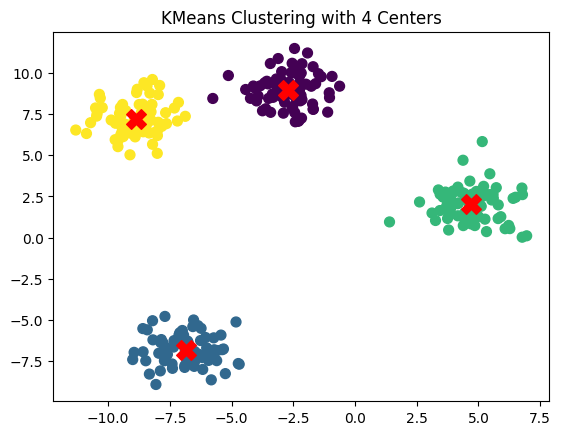

In [1]:
#21  Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X')  # Cluster centers
plt.title("KMeans Clustering with 4 Centers")
plt.show()


In [2]:
#22 Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted label.
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# Load Iris
iris = load_iris()
X = iris.data

# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X)

# Show first 10 labels
print("First 10 predicted labels:", labels[:10])


First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


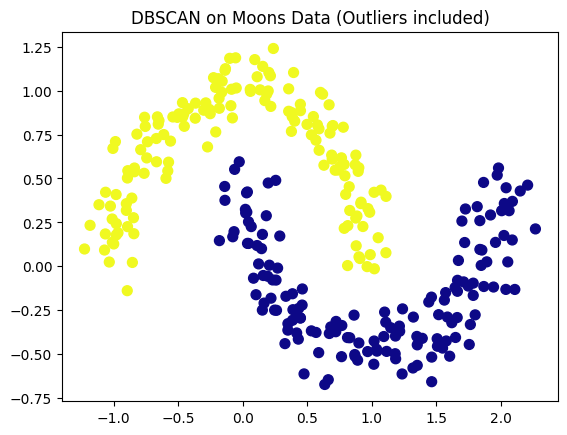

In [3]:
#23 Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate data
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot with outliers highlighted
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', s=50)
plt.title("DBSCAN on Moons Data (Outliers included)")
plt.show()


In [4]:
#24  Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster.
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Load data
wine = load_wine()
X = wine.data

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Print cluster sizes
unique, counts = np.unique(labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))
print("Cluster sizes:", cluster_sizes)


Cluster sizes: {np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


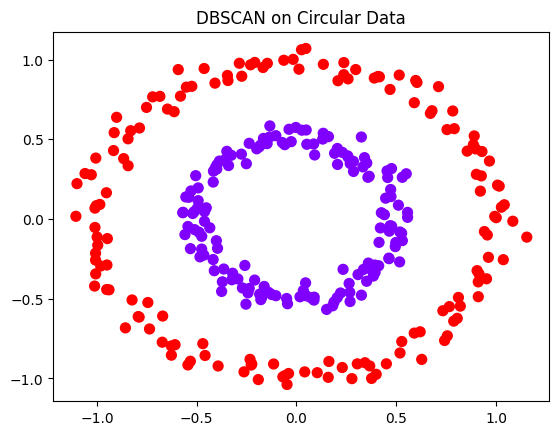

In [5]:
#25 Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result
from sklearn.datasets import make_circles

# Generate circular data
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=50)
plt.title("DBSCAN on Circular Data")
plt.show()


In [6]:
#26 Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids.
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

# Load data
data = load_breast_cancer()
X = data.data

# Scale with MinMax
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Output centroids
print("Cluster centroids:\n", kmeans.cluster_centers_)


Cluster centroids:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


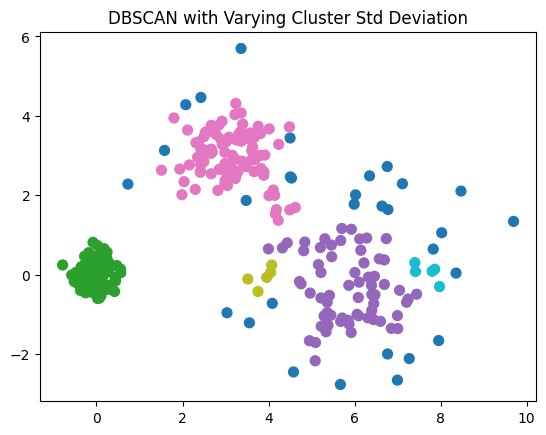

In [7]:
#27 Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN.
X, _ = make_blobs(n_samples=300, centers=[[0,0], [3,3], [6,0]],
                  cluster_std=[0.3, 0.7, 1.2], random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=50)
plt.title("DBSCAN with Varying Cluster Std Deviation")
plt.show()


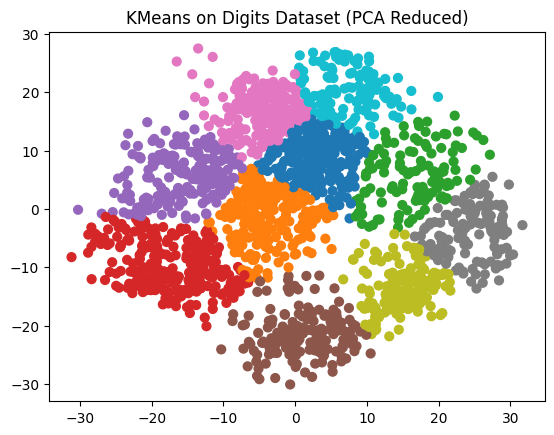

In [8]:
#28 Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# Load data
digits = load_digits()
X = digits.data

# Reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Plot clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=40)
plt.title("KMeans on Digits Dataset (PCA Reduced)")
plt.show()


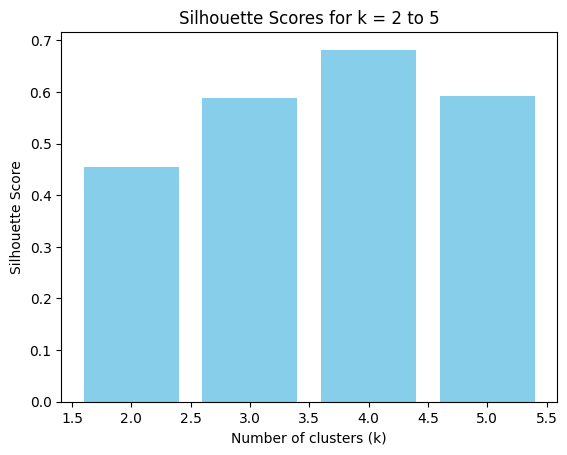

In [9]:
#29 Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart

from sklearn.metrics import silhouette_score

# Create synthetic blobs
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Evaluate silhouette scores for k = 2 to 5
scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)

# Plot bar chart
plt.bar(range(2, 6), scores, color='skyblue')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for k = 2 to 5')
plt.show()


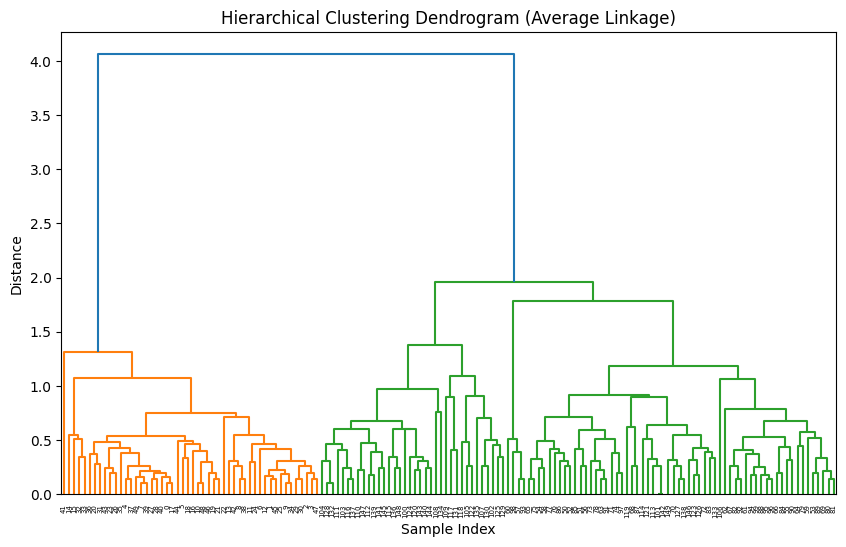

In [12]:
#30 Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkagefrom scipy.cluster.hierarchy import dendrogram, linkage


import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Compute linkage matrix using 'average' method
linked = linkage(X, method='average')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()



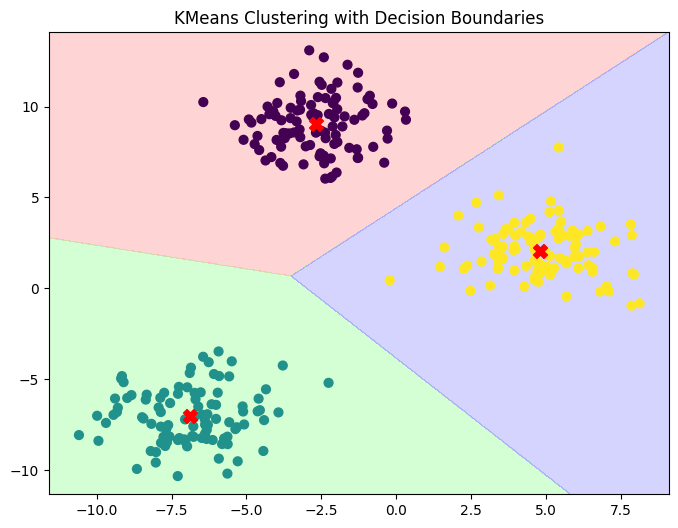

In [13]:
#31 Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries.

from matplotlib.colors import ListedColormap
import numpy as np

# Generate overlapping blobs
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.5, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Decision boundaries
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']), alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=40)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=100)
plt.title("KMeans Clustering with Decision Boundaries")
plt.show()



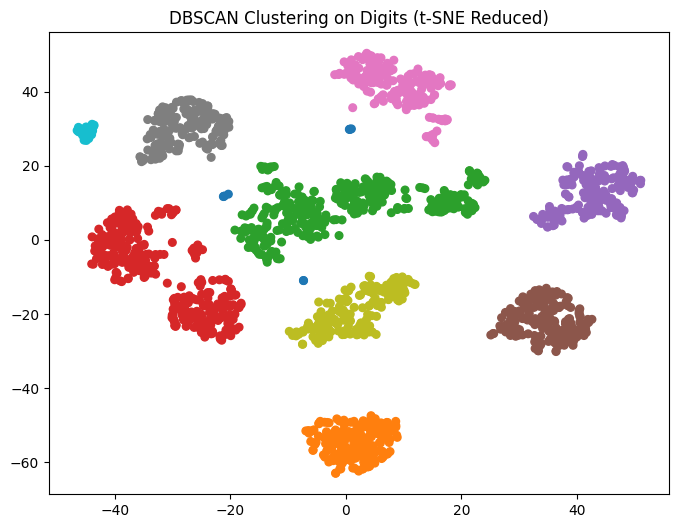

In [14]:
#32 Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load the Digits dataset
digits = load_digits()
X = digits.data

# Reduce to 2D with t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

# Plot the result
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=30)
plt.title("DBSCAN Clustering on Digits (t-SNE Reduced)")
plt.show()


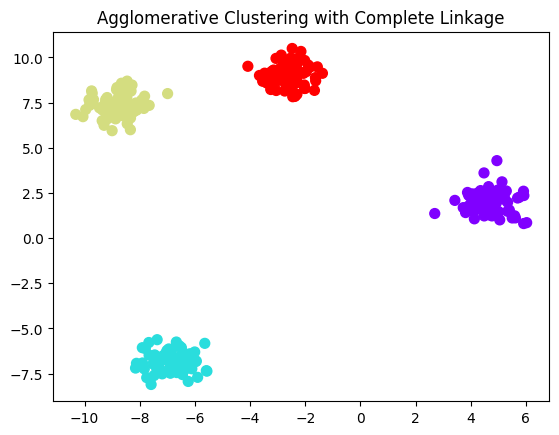

In [15]:
#33 Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Generate synthetic blobs
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Apply Agglomerative Clustering with complete linkage
agg = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agg.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=50)
plt.title("Agglomerative Clustering with Complete Linkage")
plt.show()



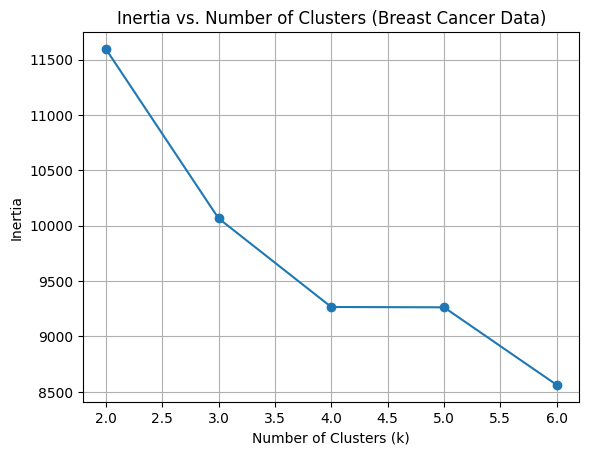

In [16]:
#34 Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot.

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load data
data = load_breast_cancer()
X = data.data

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Inertia for k = 2 to 6
inertias = []
k_values = range(2, 7)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot
plt.plot(k_values, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Inertia vs. Number of Clusters (Breast Cancer Data)")
plt.grid(True)
plt.show()



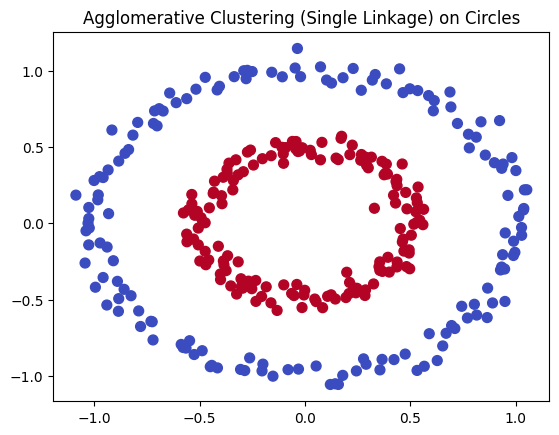

In [17]:
#35 Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage

from sklearn.datasets import make_circles

# Generate concentric circles
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)

# Apply Agglomerative Clustering with single linkage
agg = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm', s=50)
plt.title("Agglomerative Clustering (Single Linkage) on Circles")
plt.show()



In [18]:
#36 Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise)

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load dataset
wine = load_wine()
X = wine.data

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Count clusters (exclude noise label -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters found (excluding noise):", n_clusters)


Number of clusters found (excluding noise): 0


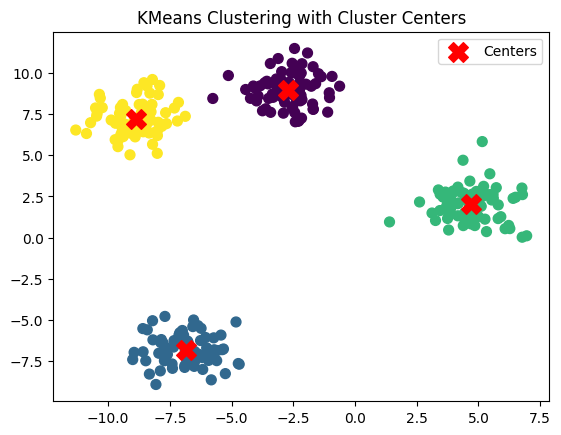

In [19]:
#37 Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centers')
plt.title("KMeans Clustering with Cluster Centers")
plt.legend()
plt.show()


In [20]:
#38 Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load Iris data
iris = load_iris()
X = iris.data

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Count noise samples
n_noise = list(labels).count(-1)
print("Number of noise samples detected by DBSCAN:", n_noise)


Number of noise samples detected by DBSCAN: 4


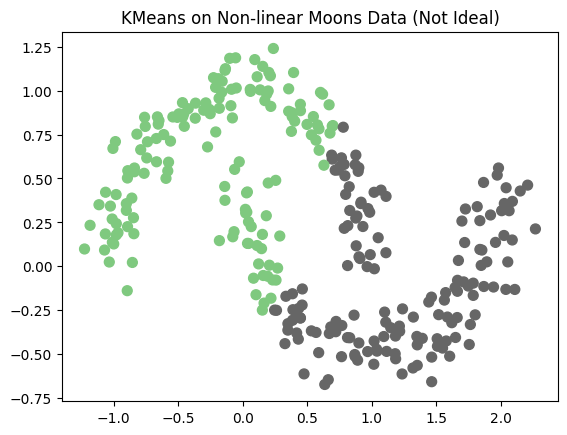

In [21]:
#39 Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result

from sklearn.datasets import make_moons

# Generate moons
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent', s=50)
plt.title("KMeans on Non-linear Moons Data (Not Ideal)")
plt.show()


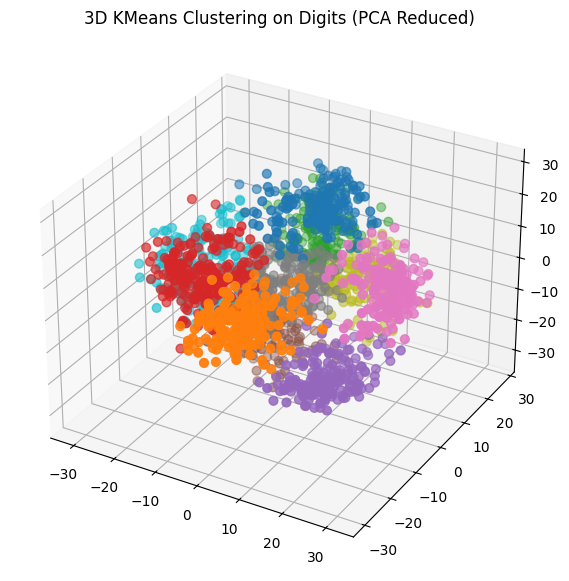

In [22]:
#40 Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

# Load digits data
digits = load_digits()
X = digits.data

# Reduce to 3D using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# 3D Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='tab10', s=40)
ax.set_title("3D KMeans Clustering on Digits (PCA Reduced)")
plt.show()


Silhouette Score for 5 clusters: 0.679


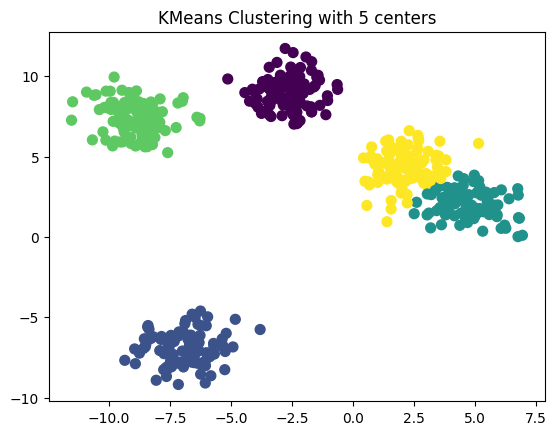

In [23]:
#41 Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Generate synthetic data with 5 centers
X, _ = make_blobs(n_samples=500, centers=5, cluster_std=1.0, random_state=42)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

# Calculate silhouette score
score = silhouette_score(X, labels)
print(f"Silhouette Score for 5 clusters: {score:.3f}")

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("KMeans Clustering with 5 centers")
plt.show()


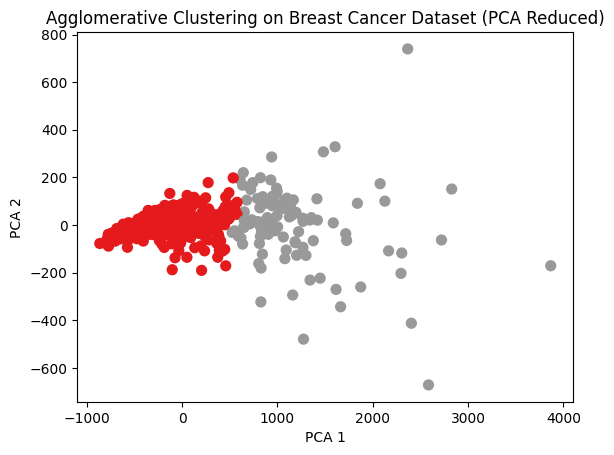

In [24]:
#42 Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering visulize in 2D

from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = data.data

# Reduce to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Agglomerative clustering with 2 clusters (as breast cancer is binary classification)
agg = AgglomerativeClustering(n_clusters=2)
labels = agg.fit_predict(X_pca)

# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Set1', s=50)
plt.title("Agglomerative Clustering on Breast Cancer Dataset (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


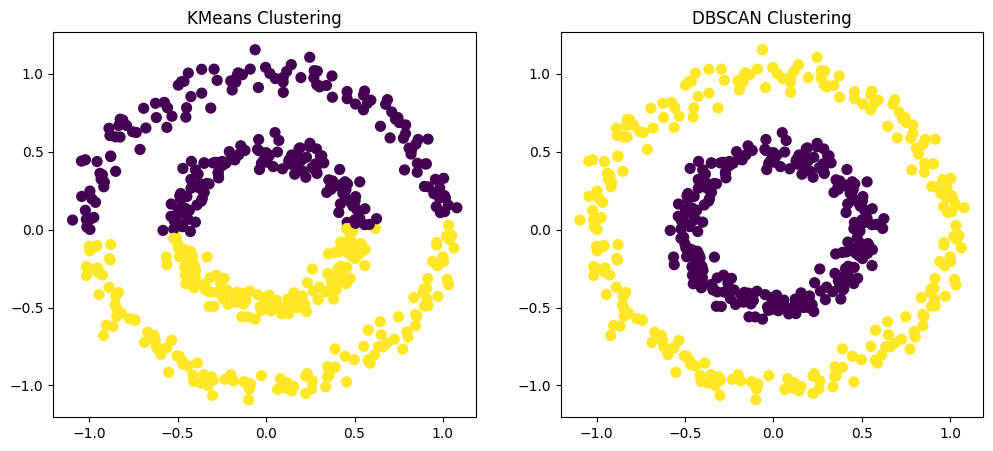

In [25]:
#43 Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side

from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

# Generate noisy circles data
X, _ = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

# KMeans clustering (not ideal for this data)
kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.15, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis', s=50)
axes[0].set_title('KMeans Clustering')

axes[1].scatter(X[:, 0], X[:, 1], c=labels_dbscan, cmap='viridis', s=50)
axes[1].set_title('DBSCAN Clustering')

plt.show()


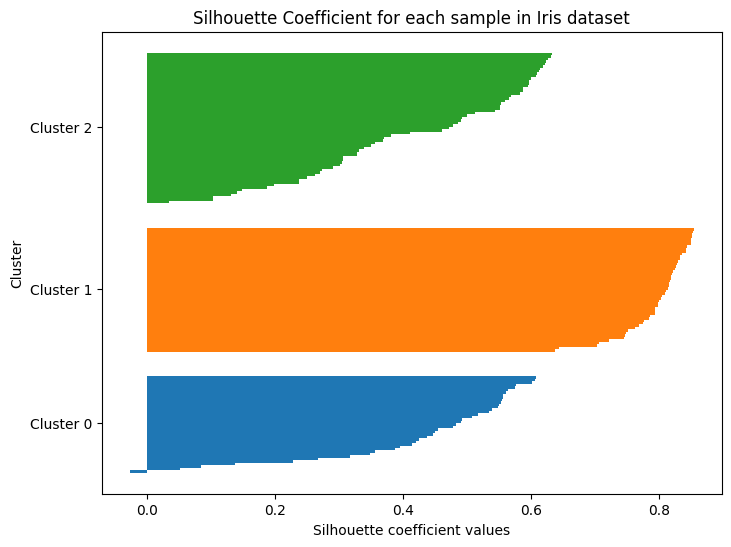

In [26]:
#44  Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# Load Iris data
iris = load_iris()
X = iris.data

# KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Calculate silhouette scores for each sample
silhouette_vals = silhouette_samples(X, labels)

# Plot silhouette coefficients per sample
plt.figure(figsize=(8, 6))
y_ticks = []
y_lower = 0
for i in range(3):
    ith_cluster_silhouette_vals = silhouette_vals[labels == i]
    ith_cluster_silhouette_vals.sort()
    y_upper = y_lower + len(ith_cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), ith_cluster_silhouette_vals, edgecolor='none', height=1)
    y_ticks.append(y_lower + len(ith_cluster_silhouette_vals) / 2)
    y_lower = y_upper + 10  # 10 for spacing

plt.yticks(y_ticks, [f"Cluster {i}" for i in range(3)])
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster")
plt.title("Silhouette Coefficient for each sample in Iris dataset")
plt.show()


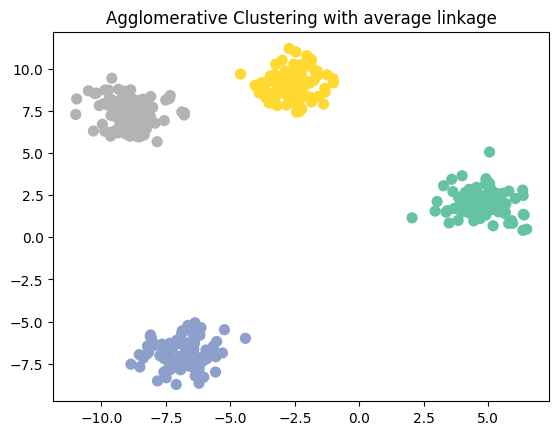

In [27]:
#45 Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage Visualize clusters

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=400, centers=4, cluster_std=0.8, random_state=42)

# Agglomerative clustering with average linkage
agg = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agg.fit_predict(X)

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set2', s=50)
plt.title("Agglomerative Clustering with average linkage")
plt.show()


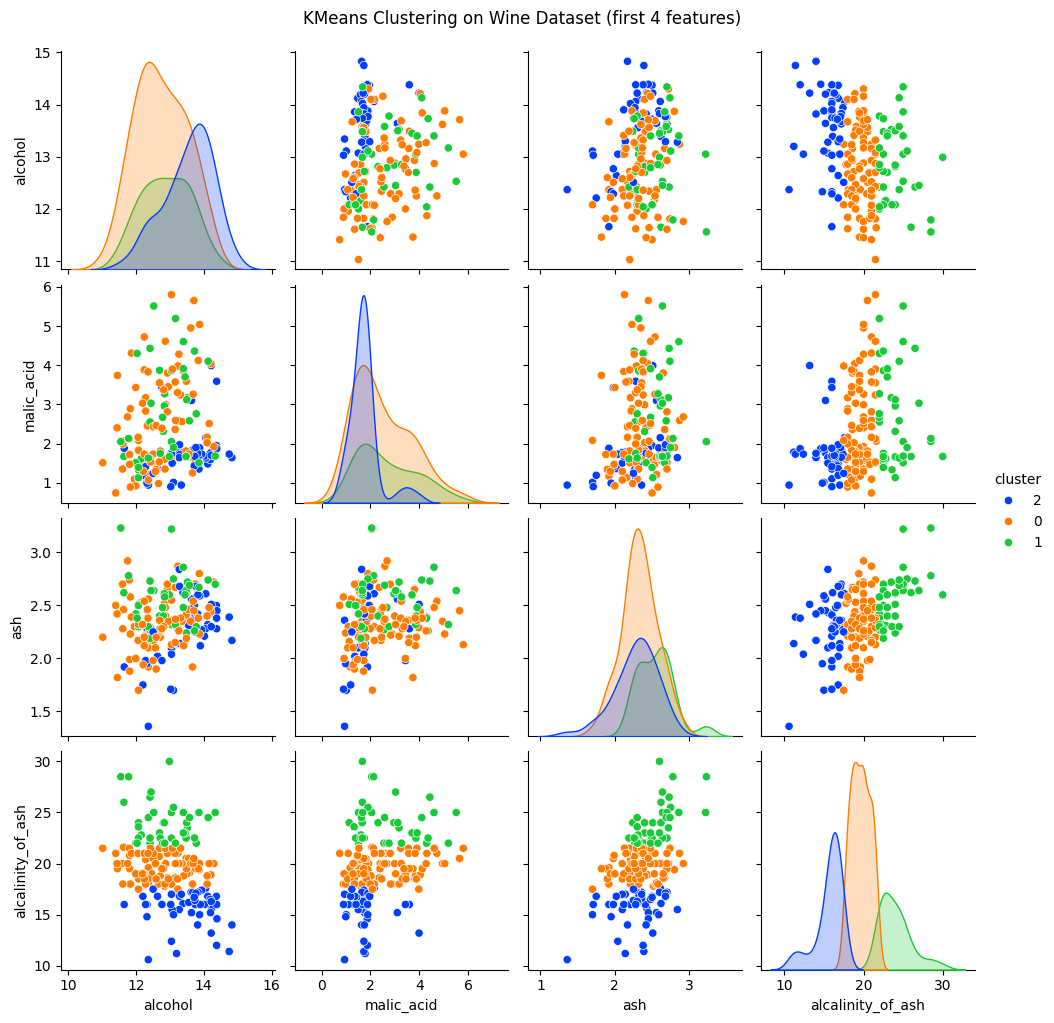

In [28]:
#46 Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features)

import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import pandas as pd

# Load Wine dataset
wine = load_wine()
X = wine.data[:, :4]  # first 4 features
feature_names = wine.feature_names[:4]

# Apply KMeans with 3 clusters (wine dataset has 3 classes)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Prepare DataFrame for seaborn
df = pd.DataFrame(X, columns=feature_names)
df['cluster'] = labels.astype(str)

# Plot pairplot
sns.pairplot(df, hue='cluster', diag_kind='kde', palette='bright')
plt.suptitle("KMeans Clustering on Wine Dataset (first 4 features)", y=1.02)
plt.show()


In [29]:
#47  Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count

from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

# Generate noisy blobs
X, _ = make_blobs(n_samples=500, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=5)
labels = dbscan.fit_predict(X)

# Count clusters and noise points
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")


Number of clusters found: 4
Number of noise points: 47


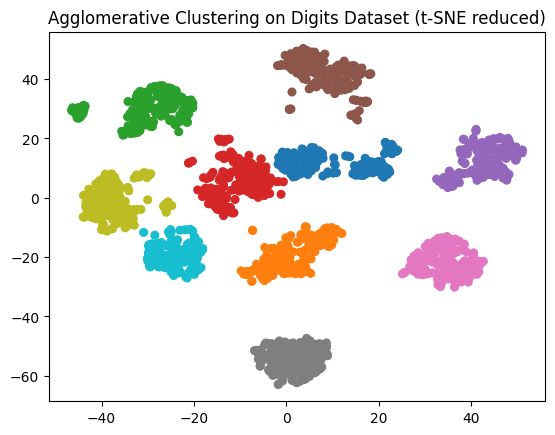

In [30]:
#48 Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load Digits dataset
digits = load_digits()
X = digits.data

# Reduce to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Agglomerative clustering (let's assume 10 clusters as digits are 0-9)
agg = AgglomerativeClustering(n_clusters=10)
labels = agg.fit_predict(X_tsne)

# Plot clusters
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=30)
plt.title("Agglomerative Clustering on Digits Dataset (t-SNE reduced)")
plt.show()
